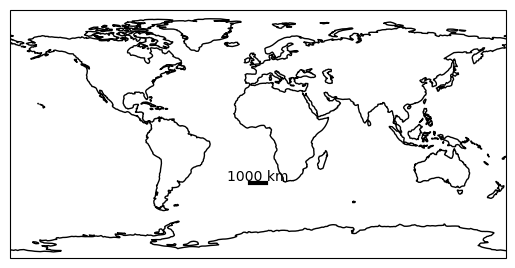

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    # Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    # Make tmc horizontally centred on the middle of the map,
    # vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    # Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    # Calculate a scale bar length if none has been given
    if not length: 
        length = (x1 - x0) / 5000  # in km
        ndim = int(np.floor(np.log10(length)))  # number of digits in number
        length = round(length, -ndim)  # round to 1sf

        # Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: 
                return int(x)
            return int(str(x)[0]) * 10 ** (len(str(x)) - 1)

        length = scale_number(length)

    # Draw the scale bar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    bar_ys = [sby, sby]
    ax.plot(bar_xs, bar_ys, transform=tmc, color='k', linewidth=linewidth)
    ax.text(sbx, sby - 1000, f'{length} km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

# 创建一个带有 Cartopy 投影的绘图
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# 设置地图的范围（例如，显示整个世界）
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# 添加海岸线
ax.coastlines()

# 调用 scale_bar 函数在地图上绘制比例尺
scale_bar(ax, length=1000, location=(0.5, 0.4), linewidth=3)

# 显示绘图
plt.show()